# Phys555 Assignment 2 Question 1
Karlee Zammit - V00823093

## Datasets, Data Mining, and Data Visualization (using PCA)

Q1- Find two 'suitable' and 'challenging' data sets; one for regression and another for a classification problem. Describe the two data sets in one notebook (inputs and targets) and explain how they can be used for regression and classification. Write about works/applications that have been previously done regarding the chosen data sets. Also, conduct data mining, such as feature visualization and present informative data, using PCA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
bottle_data = pd.read_csv(r'C:\Users\Karlee\Documents\Masters\Classes\PHYS555\assign2_data\regression\bottle.csv') 
print(bottle_data.columns) 
#print(len(bottle_data.columns))

#limitPer = len(bottle_data) * .90
#bottle_cleaned = bottle_data.dropna(thresh=limitPer, axis=1, how='all')
#df_notnull = bottle_cleaned[bottle_cleaned.notnull()]
#print(df_notnull)

# check for non-values 
result = bottle_data.applymap(np.isreal)
cleaned = bottle_data.select_dtypes([np.number])

#plt.hist(df_notnull)

C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


864863
70
70
864863


(array([[8.64863e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [8.64820e+04, 8.64870e+04, 8.64870e+04, 8.64860e+04, 8.64870e+04,
         8.64870e+04, 8.64860e+04, 8.64870e+04, 8.64870e+04, 8.64870e+04],
        [8.64863e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [8.53900e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [8.17509e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [6.96201e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [8.12174e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+0

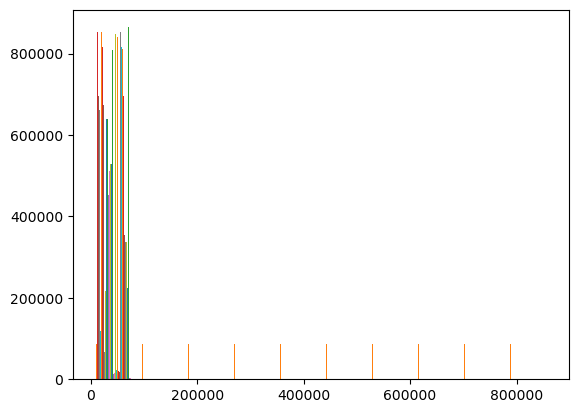

In [3]:
print(len(cleaned))
print(len(cleaned.columns))
df_notnull = cleaned[cleaned.notnull()]
print(len(df_notnull.columns))
print(len(df_notnull))

plt.hist(df_notnull)

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual',
       'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA',
       'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu',
       'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p',
       'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq',
       'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')
864863
0              1
1              2
2              3
3              4
4              5
           ...  
864858    864859
864859    864860
864860    864861
864861    864862
864862    864863
Name: Btl_Cnt, Length: 864863, 

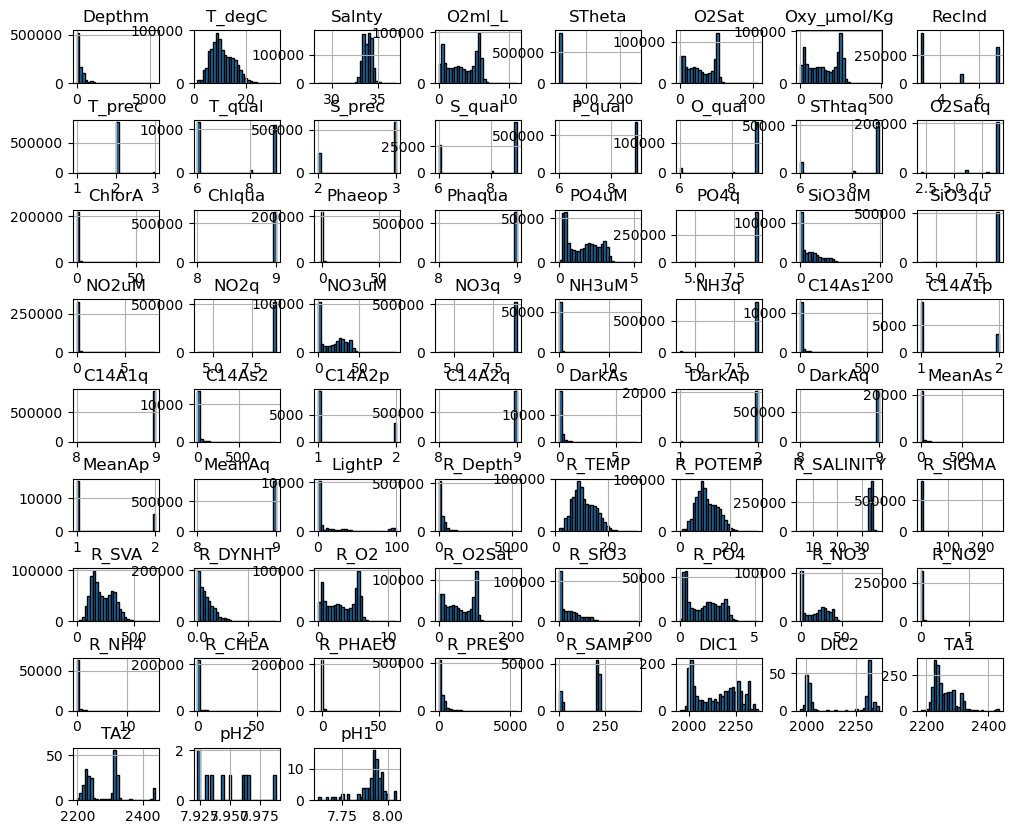

In [4]:
print(df_notnull.columns)
print(np.max(df_notnull['Btl_Cnt']))
print(df_notnull['Btl_Cnt'])
df_f1 = df_notnull.drop(labels=['Btl_Cnt'], axis=1)
#print(df_final.columns)

#plt.hist(df_f1)
print(np.max(df_f1['Cst_Cnt']))
df_f2 = df_f1.drop(labels=['Cst_Cnt'], axis=1)

#plt.hist(df_f2)
#print(df_f2.columns)
df_f3 = df_f2.drop(labels=['BtlNum'], axis=1)
print(df_f3.columns)
#plt.hist(df_f3)

df_f3.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'PO4uM'], dtype='object')
864863


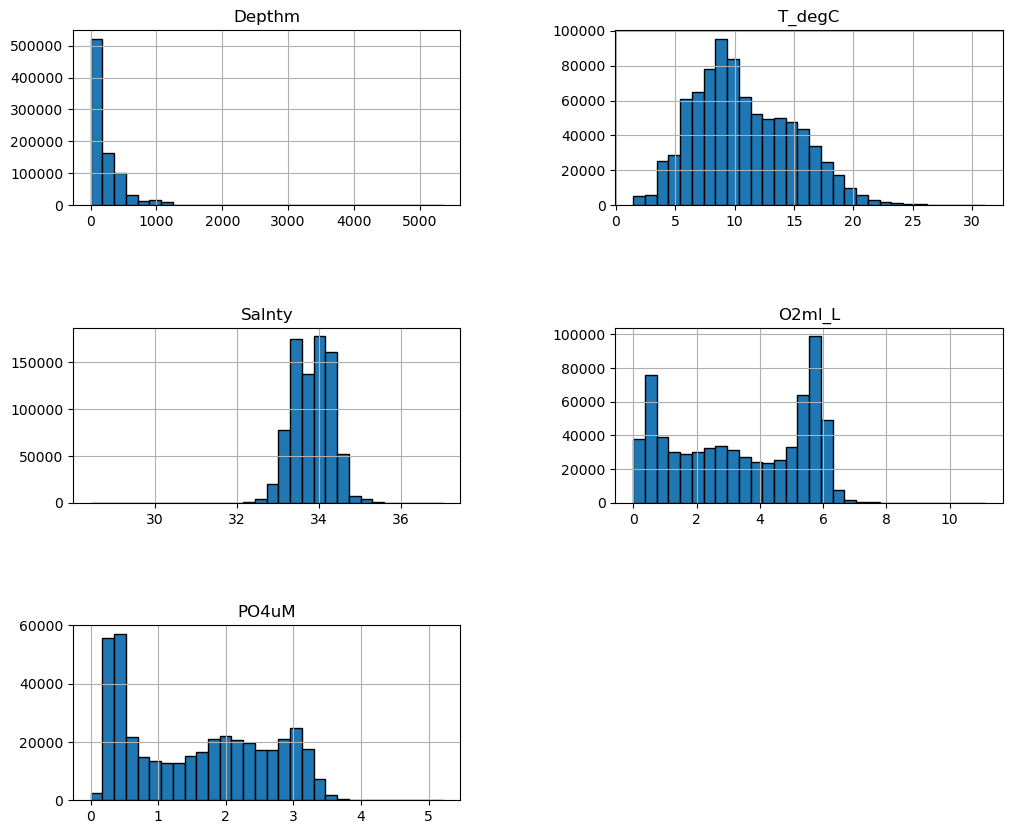

In [5]:
df_analysis = pd.DataFrame().assign(Depthm=df_f3['Depthm'], T_degC=df_f3['T_degC'], Salnty=df_f3['Salnty'],
                                  O2ml_L=df_f3['O2ml_L'], PO4uM=df_f3['PO4uM'])
print(df_analysis.columns)
print(len(df_analysis))

#df_del = df_analysis.dropna(axis=1, inplace=True)

df_analysis.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


In [6]:
df_final = df_analysis.dropna(axis=0, how='all', inplace=False)
print(len(df_final))
df_final_final = df_analysis.dropna(axis=1, how='all', inplace=False)
print(df_final_final.columns)
print(len(df_final_final))

nan_count = df_final_final.isna().sum().sum()
print(nan_count)

df2 =df_final_final.dropna(axis=0)
print(len(df2))

nan_count = df2.isna().sum().sum()
print(nan_count)

864863
Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'PO4uM'], dtype='object')
864863
678525
391264
0


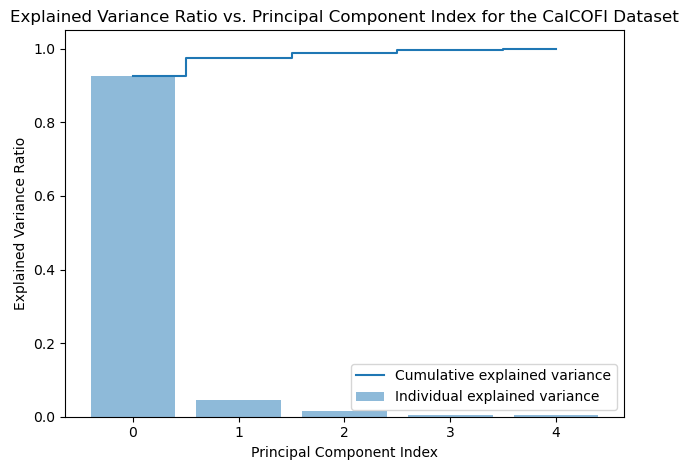

In [7]:
sc = MinMaxScaler()

# Train the estimator on the input alfalfa data. This method calculates the mean and variance of each of the features present in the data. 
sc.fit(df2)

# Apply the method to the alfalfa data, to transform all of the features using their respective mean and variance.
df_norm = sc.transform(df2)

# Initialize scikit learns principal component analysis function
pca = PCA()

# Determine transformed features
df_analysis_pca = pca.fit_transform(df_norm)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance Ratio vs. Principal Component Index for the CalCOFI Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## References



https://www.kaggle.com/datasets/sohier/calcofi?resource=download

https://towardsdatascience.com/linear-regression-modelling-oceanographic-data-fdc3a98813bf

https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste